# ROMY Barometer - Statistic Plots

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from obspy import read_inventory

from andbro__read_sds import __read_sds

In [2]:
from functions.get_mean_promy_pressure import __get_mean_promy_pressure
from functions.get_mean_rmy_pressure import __get_mean_rmy_pressure

In [3]:
#%matplotlib tk

In [4]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename in ['lin-ffb-01', 'ambrym', 'hochfelln']:
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

## Configurations

In [5]:
config = {}

# output path for figures
config['path_to_figs'] = data_path+"romy_baro/figures/"

# path to data archive
config['path_to_data'] = data_path+"romy_baro/data/"



## Load Data

In [20]:
df = pd.read_pickle(config['path_to_data']+"RB_statistics.pkl")

In [21]:
df = df[df.status == False]

In [22]:
df.keys()

Index(['t1', 't2', 'status', 'shift_PP_N', 'shift_PP_E', 'shift_HP_N',
       'shift_HP_E', 'cmax_PP_N', 'cmax_PP_E', 'cmax_HP_N', 'cmax_HP_E', 'r_z',
       'r_n', 'r_e', 'a_z', 'a_n', 'a_e', 'b_z', 'b_n', 'b_e'],
      dtype='object')

In [23]:
for k in ["shift_PP_N", "shift_PP_E", "shift_HP_N", "shift_HP_E"]:
    df[k] = df[k]/20 # 20 Hz sampling rate


In [24]:
df = df[df.b_e != 0]

In [25]:
df

,t1,t2,status,shift_PP_N,shift_PP_E,shift_HP_N,shift_HP_E,cmax_PP_N,cmax_PP_E,cmax_HP_N,cmax_HP_E,r_z,r_n,r_e,a_z,a_n,a_e,b_z,b_n,b_e
20,2024-03-21T16:00:00.000000Z,2024-03-21T19:00:00.000000Z,False,253.75,254.85,237.45,239.45,-0.592412,0.483615,0.579556,-0.469664,16.45,20.82,10.96,-6.616427e-10,9.522324e-11,-2.770598e-11,-8.062201e-10,1.173076e-09,-6.539272e-10
21,2024-03-21T18:00:00.000000Z,2024-03-21T21:00:00.000000Z,False,-12.15,-11.25,0.35,0.75,-0.606405,0.465883,-0.621258,0.441811,10.12,39.90,21.94,-1.067600e-09,-3.548841e-10,3.942684e-10,3.377241e-11,-1.891983e-09,1.079184e-09
25,2024-03-22T02:00:00.000000Z,2024-03-22T05:00:00.000000Z,False,-24.50,-296.50,-7.85,-8.60,-0.485211,0.443180,-0.535905,0.439545,4.23,24.53,17.34,3.349622e-10,5.424214e-10,-6.469025e-10,-4.781757e-10,-5.311896e-10,5.648249e-10
41,2024-03-23T10:00:00.000000Z,2024-03-23T13:00:00.000000Z,False,221.30,221.20,235.95,235.45,0.491418,-0.457036,0.462093,-0.424369,55.94,8.42,3.68,-2.733091e-13,3.317644e-10,-3.920214e-10,1.111943e-10,-1.265229e-09,4.756768e-10
42,2024-03-23T12:00:00.000000Z,2024-03-23T15:00:00.000000Z,False,-11.55,13.95,1.25,1.70,0.719111,0.698236,0.871303,-0.842116,14.74,75.76,69.74,-3.694375e-10,5.434011e-10,-4.156848e-10,-3.489947e-10,3.137715e-09,-1.843639e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,2024-05-17T16:00:00.000000Z,2024-05-17T19:00:00.000000Z,False,-264.90,-293.15,-442.45,-276.20,-0.278148,-0.320963,-0.271165,-0.315643,2.41,2.74,4.43,-3.713364e-10,4.518965e-10,3.032849e-10,1.154894e-09,7.826350e-10,-1.406967e-09
705,2024-05-17T18:00:00.000000Z,2024-05-17T21:00:00.000000Z,False,322.20,11.75,-1.75,-1.75,-0.409296,-0.322809,-0.456821,0.355063,2.09,20.59,12.52,9.012585e-10,7.989942e-10,-5.526593e-10,-7.238469e-10,-3.018097e-09,2.395890e-09
722,2024-05-19T04:00:00.000000Z,2024-05-19T07:00:00.000000Z,False,210.60,205.55,224.75,192.35,0.367257,-0.455941,0.411381,0.469870,1.92,8.02,9.84,-1.157351e-09,-5.028572e-09,2.007983e-09,-1.320496e-09,-1.857481e-09,2.281649e-09
729,2024-05-19T18:00:00.000000Z,2024-05-19T21:00:00.000000Z,False,-15.40,-16.90,-0.05,-2.90,-0.435446,0.571276,-0.453055,0.628666,14.79,20.68,38.43,-2.332066e-10,-1.037002e-10,-6.193198e-10,-9.056788e-10,-1.970377e-09,2.304633e-09


In [26]:
df2 = df[(df.r_z > 50) & (df.r_n > 50) & (df.r_e > 50)]

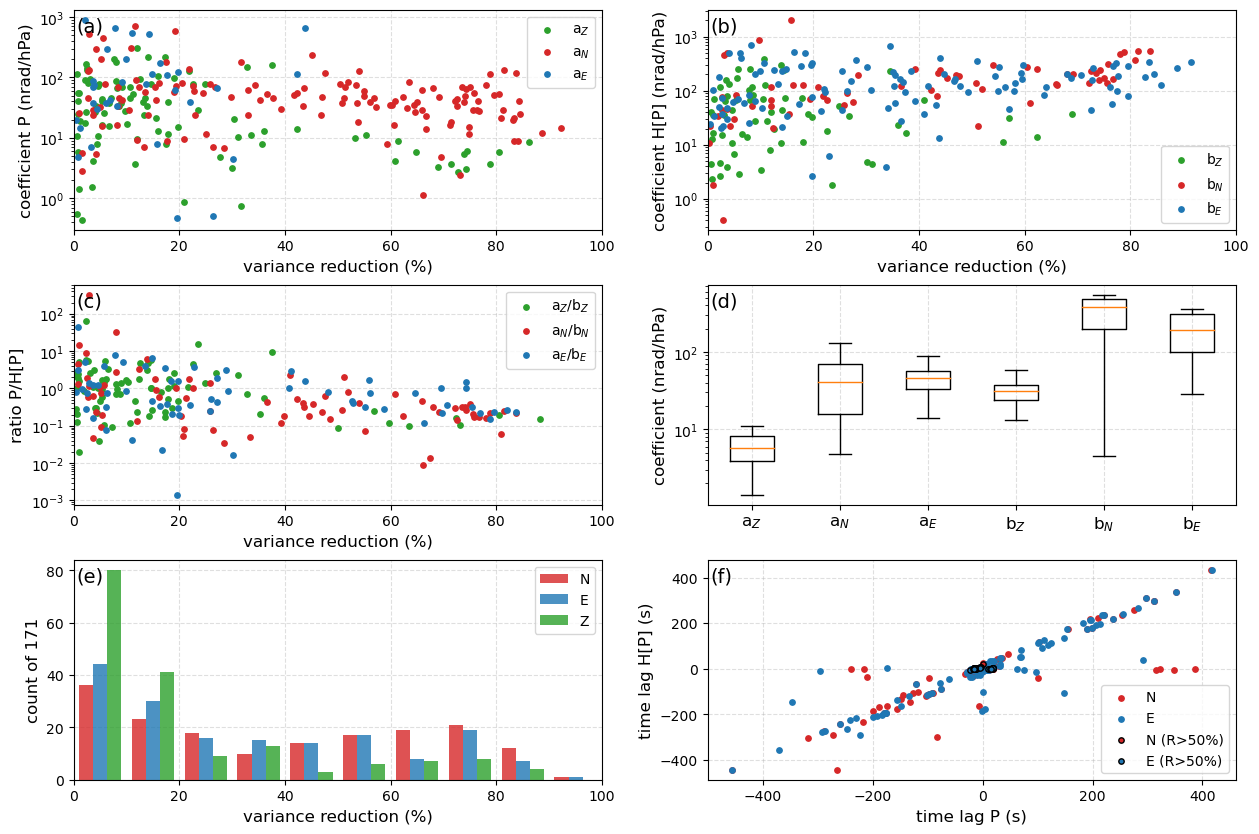

In [30]:
def __makeplot():

    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec

    colors = {"Z":"tab:green", "N":"tab:red", "E":"tab:blue"}

    Nrow, Ncol = 3, 2

    font = 12

    scale, unit = 1e11, "nrad/hPa"

    hil = r"H[P]"

    fig = plt.figure(figsize=(15, 10))

    gs = GridSpec(Nrow, Ncol, figure=fig, hspace=0.25)

    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1])
    ax4 = fig.add_subplot(gs[2, 0])
    ax5 = fig.add_subplot(gs[2, 1])

    # ___________________________________________________
    ax0.scatter(df.r_z, df.a_z*scale, s=15, color=colors["Z"], label=r"a$_Z$", zorder=2)
    ax0.scatter(df.r_n, df.a_n*scale, s=15, color=colors["N"], label=r"a$_N$", zorder=2)
    ax0.scatter(df.r_e, df.a_e*scale, s=15, color=colors["E"], label=r"a$_E$", zorder=2)
    ax0.legend(fontsize=font-2)
    ax0.set_yscale("log")
    ax0.set_xlim(0, 100)
    ax0.set_xlabel(f"variance reduction (%)", fontsize=font)
    ax0.set_ylabel(f"coefficient P ({unit})", fontsize=font)

    # ___________________________________________________
    ax1.scatter(df.r_z, df.b_z*scale, s=15, color=colors["Z"], label=r"b$_Z$", zorder=2)
    ax1.scatter(df.r_n, df.b_n*scale, s=15, color=colors["N"], label=r"b$_N$", zorder=2)
    ax1.scatter(df.r_e, df.b_e*scale, s=15, color=colors["E"], label=r"b$_E$", zorder=2)
    ax1.legend(fontsize=font-2)
    ax1.set_yscale("log")
    ax1.set_xlim(0, 100)
    ax1.set_xlabel(f"variance reduction (%)", fontsize=font)
    ax1.set_ylabel(f"coefficient {hil} ({unit})", fontsize=font)

    # ___________________________________________________
    ax2.scatter(df.r_z, (df.a_z*scale)/(df.b_z*scale), s=15, color=colors["Z"], label=r"a$_Z$/b$_Z$", zorder=2)
    ax2.scatter(df.r_n, (df.a_n*scale)/(df.b_n*scale), s=15, color=colors["N"], label=r"a$_N$/b$_N$", zorder=2)
    ax2.scatter(df.r_e, (df.a_e*scale)/(df.b_e*scale), s=15, color=colors["E"], label=r"a$_E$/b$_E$", zorder=2)
    ax2.legend(fontsize=font-2)
    # ax2.set_ylim(-2, 2)
    ax2.set_xlim(0, 100)
    ax2.set_yscale("log")
    ax2.set_xlabel(f"variance reduction (%)", fontsize=font)
    ax2.set_ylabel(f"ratio P/{hil}", fontsize=font)

    # ___________________________________________________
    # ax3.boxplot([abs(df.a_z*scale), abs(df.a_n*scale), abs(df.a_e*scale), abs(df.b_z*scale), abs(df.b_n*scale), abs(df.b_e*scale)],)
    ax3.boxplot([abs(df2.a_z*scale), abs(df2.a_n*scale), abs(df2.a_e*scale), abs(df2.b_z*scale), abs(df2.b_n*scale), abs(df2.b_e*scale)],)
    ax3.set_yscale("log")
    ax3.set_xticklabels([r"a$_Z$", r"a$_N$", r"a$_E$", r"b$_Z$", r"b$_N$", r"b$_E$"], fontsize=font)
    ax3.set_ylabel(f"coefficient ({unit})", fontsize=font)

    # ___________________________________________________
    ax4.hist([df.r_n, df.r_e, df.r_z], bins=10, range=[0, 100], alpha=0.8,
             rwidth=0.8, align="mid", density=False, zorder=2,
             color=[colors["N"], colors["E"], colors["Z"]], label=["N","E","Z"],
            )
    ax4.grid(alpha=0.2, ls="--", zorder=0)
    ax4.set_xlim(0, 100)
    ax4.legend(fontsize=font-2)
    ax4.set_xlabel(f"variance reduction (%)", fontsize=font)
    ax4.set_ylabel(f"count of {df.shape[0]}", fontsize=font)

    # ___________________________________________________
    # ax5.scatter(df.r_z, df.a_z, color=colors["Z"], label=r"b$_Z$", zorder=2)
    ax5.scatter(df.shift_PP_N, df.shift_HP_N, s=15, color=colors["N"], label=r"N", zorder=2)
    ax5.scatter(df.shift_PP_E, df.shift_HP_E, s=15, color=colors["E"], label=r"E", zorder=2)
    ax5.scatter(df2.shift_PP_N, df2.shift_HP_N, s=15, color=colors["N"], label=r"N (R>50%)", zorder=2, edgecolor="k")
    ax5.scatter(df2.shift_PP_E, df2.shift_HP_E, s=15, color=colors["E"], label=r"E (R>50%)", zorder=2, edgecolor="k")
    ax5.legend(fontsize=font-2, loc=4)
    # ax5.set_ylim(-2, 2)
    # ax5.set_xlim(0, 100)
    ax5.set_xlabel(f"time lag P (s)", fontsize=font)
    ax5.set_ylabel(f"time lag {hil} (s)", fontsize=font)

    ax0.text(.005, .97,"(a)", ha='left', va='top', transform=ax0.transAxes, fontsize=font+2)
    ax1.text(.005, .97,"(b)", ha='left', va='top', transform=ax1.transAxes, fontsize=font+2)
    ax2.text(.005, .97,"(c)", ha='left', va='top', transform=ax2.transAxes, fontsize=font+2)
    ax3.text(.005, .97,"(d)", ha='left', va='top', transform=ax3.transAxes, fontsize=font+2)
    ax4.text(.005, .97,"(e)", ha='left', va='top', transform=ax4.transAxes, fontsize=font+2)
    ax5.text(.005, .97,"(f)", ha='left', va='top', transform=ax5.transAxes, fontsize=font+2)


    axes = [ax0, ax1, ax2, ax3, ax4, ax5]
    for ax in axes:
        ax.grid(ls="--", alpha=0.4, zorder=0)


    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figs']+f"RB_statistic_plots.png", format="png", dpi=150, bbox_inches='tight')
